In [16]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 윈도우: 맑은 고딕
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font", family=font_name)

# 코스피, 코스닥, 코스피200 지수 정보 추출

# TOP 종목에서 '거래상위' 항목 수집

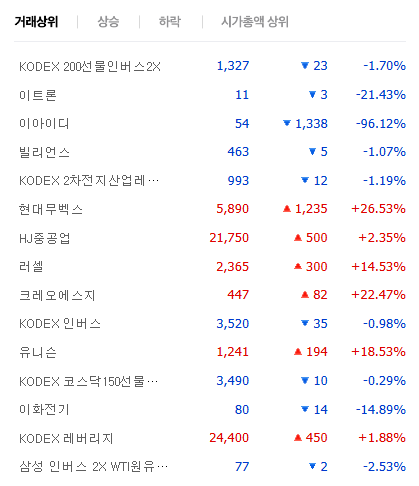

* 종목명, 현재가, 전일대비, 등락률 추출
* 'TOP 종목'은 브라우저상에서는 클릭을 해야 볼수 있는 정보이다.
* 만약에 클릭할때마다 웹주소가 바뀐다면 바뀐주소로 스크래핑해야한다.
* 'TOP 종목' 클릭해도 주소가 바뀌어 새로운 링크로 로드가되는 페이지가 아니다.
* 이 경우 셀레니엄에서 해당 데이터가 보이는지 확인해야한다.
    * 해당 데이터가 보인다면 바로 스크래핑한다.
    * 해당 데이터가 보이지 않는다면 브라우저 제어 기술을 사용해야한다.

<html data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36" lang="ko"><head>
<title>네이버페이 증권</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="네이버페이 증권" name="apple-mobile-web-app-title"/>
<meta content="네이버페이 증권" property="og:title"/>
<meta content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" property="og:image"/>
<meta content="https://finance.naver.com" property="og:url"/>
<meta content="국내 해외 증시 지수, 시장지표, 뉴스, 증권사 리서치 등 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="" property="og:article:thumbnailUrl"/>
<meta content="네이버페이 증권" property="og:article:author"/>
<meta content="http://FINANCE.NAVER.COM" property="og:article:author:url"/>
<link href="https://ssl.pstatic.net/imgstoc
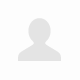
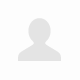

In [2]:
from bs4 import BeautifulSoup
import pandas as pd

# HTML 파일을 읽기 모드로 열기
with open("네이버증시_25-09-02.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# BeautifulSoup을 사용하여 HTML 파싱
soup = BeautifulSoup(html_content, "html.parser")
soup

* 예상 변환

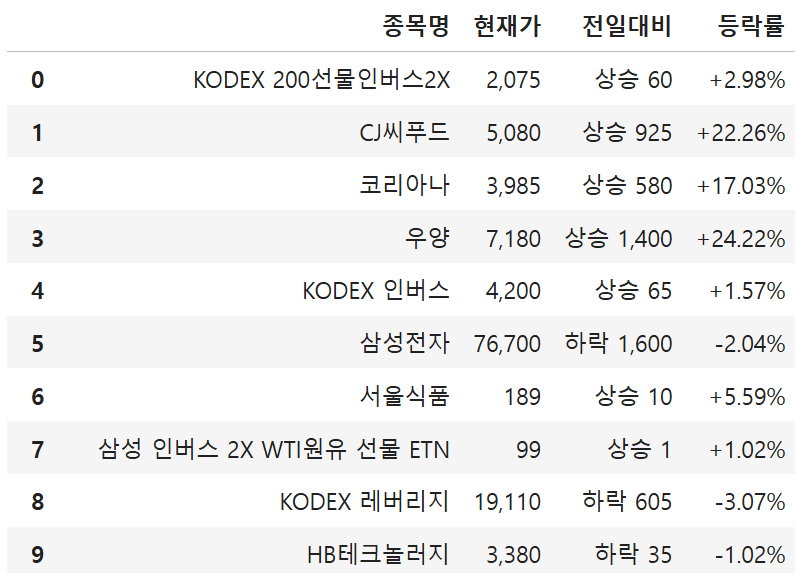

In [3]:
data=[]

for item in soup.select("div.group_type.krx_group_type.tab1 table.tbl_home tbody#_topItems1 tr"):
    title = item.find("th").text.strip()                     # 종목명
    price = item.find_all("td")[0].text.strip().replace(",", "")   # 주가
    change = item.find_all("td")[1].text.strip()             # 등락액
    change_percent = item.find_all("td")[2].text.strip()     # 등락률
    data.append([title, price, change, change_percent])
  

# DataFrame 생성
df = pd.DataFrame(data, columns=["종목명", "가격", "등락액", "등락률"])
df


,종목명,가격,등락액,등락률
0,KODEX 200선물인버스2X,1326,하락 24,-1.78%
1,이트론,11,하락 3,-21.43%
2,이아이디,54,"하락 1,338",-96.12%
3,빌리언스,462,하락 6,-1.28%
4,KODEX 2차전지산업레버리지,994,하락 11,-1.09%
5,현대무벡스,5900,"상승 1,245",+26.75%
6,HJ중공업,21750,상승 500,+2.35%
7,러셀,2382,상승 317,+15.35%
8,크레오에스지,427,상승 62,+16.99%
9,KODEX 인버스,3515,하락 40,-1.13%


# TOP 종목에서 '상승' 항목 수집

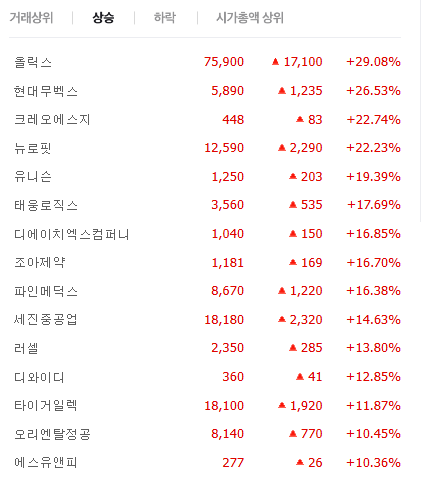

In [4]:
data=[]

for item in soup.select("div.group_type.krx_group_type.tab2 table.tbl_home tbody#_topItems2 tr"):
# for item in soup.select("#container #content .article .section .section_sise_top > div:nth-of-type(4) table.tbl_home > tbody#topItems2 > tr"):
    title = item.find("th").text.strip()                     # 종목명
    price = item.find_all("td")[0].text.strip().replace(",", "")   # 주가
    change = item.find_all("td")[1].text.strip()             # 등락액
    change_percent = item.find_all("td")[2].text.strip()     # 등락률
    data.append([title, price, change, change_percent])
  

# DataFrame 생성
df = pd.DataFrame(data, columns=["종목명", "가격", "등락액", "등락률"])
df


,종목명,가격,등락액,등락률
0,올릭스,75300,"상승 16,500",+28.06%
1,현대무벡스,5900,"상승 1,245",+26.75%
2,뉴로핏,12560,"상승 2,260",+21.94%
3,파인메딕스,8900,"상승 1,450",+19.46%
4,디에이치엑스컴퍼니,1056,상승 166,+18.65%
5,유니슨,1233,상승 186,+17.77%
6,조아제약,1190,상승 178,+17.59%
7,크레오에스지,427,상승 62,+16.99%
8,세진중공업,18400,"상승 2,540",+16.02%
9,러셀,2382,상승 317,+15.35%


* 테이블 포멧은 상동

# TOP 종목에서 '하락' 항목 수집

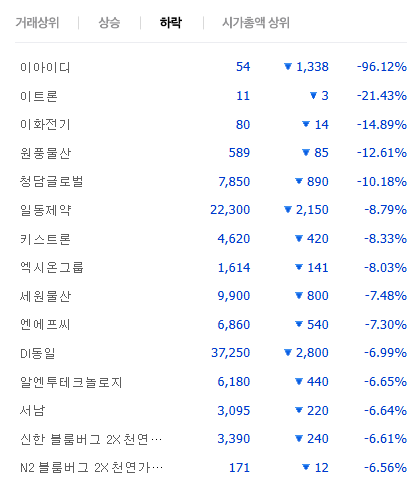

In [5]:
data=[]

for item in soup.select("div.group_type.krx_group_type.tab3 table.tbl_home tbody#_topItems3 tr"):
# for item in soup.select("#container #content .article .section .section_sise_top > div:nth-of-type(4) table.tbl_home > tbody#topItems2 > tr"):
    title = item.find("th").text.strip()                     # 종목명
    price = item.find_all("td")[0].text.strip().replace(",", "")   # 주가
    change = item.find_all("td")[1].text.strip()             # 등락액
    change_percent = item.find_all("td")[2].text.strip()     # 등락률
    data.append([title, price, change, change_percent])
  

# DataFrame 생성
df = pd.DataFrame(data, columns=["종목명", "가격", "등락액", "등락률"])
df


,종목명,가격,등락액,등락률
0,이아이디,54,"하락 -1,338",-96.12%
1,이트론,11,하락 -3,-21.43%
2,이화전기,80,하락 -14,-14.89%
3,원풍물산,593,하락 -81,-12.02%
4,청담글로벌,7840,하락 -900,-10.30%
5,일동제약,21950,"하락 -2,500",-10.22%
6,세원물산,9860,하락 -840,-7.85%
7,키스트론,4655,하락 -385,-7.64%
8,엑시온그룹,1621,하락 -134,-7.64%
9,엔에프씨,6850,하락 -550,-7.43%


* 테이블 포멧은 상동

# TOP 종목에서 '시가총액 상위' 항목 수집

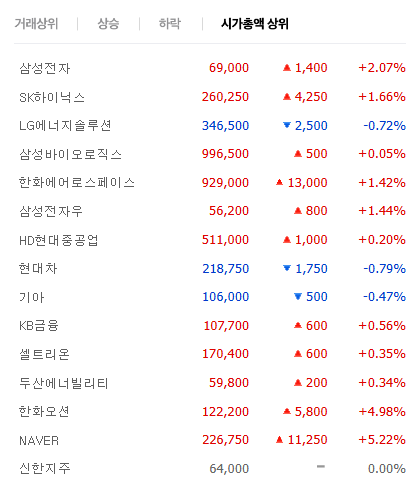

In [14]:
data=[]

for item in soup.select("div.group_type.krx_group_type.tab4 table.tbl_home tbody#_topItems4 tr"):
# for item in soup.select("#container #content .article .section .section_sise_top > div:nth-of-type(4) table.tbl_home > tbody#topItems2 > tr"):
    title = item.find("th").text.strip()                     # 종목명
    price = item.find_all("td")[0].text.strip().replace(",", "")   # 주가
    change = item.find_all("td")[1].text.strip()             # 등락액
    change_percent = item.find_all("td")[2].text.strip()     # 등락률
    data.append([title, price, change, change_percent])
  

# DataFrame 생성
df = pd.DataFrame(data, columns=["종목명", "가격", "등락액", "등락률"])
df["등락액"] = (df["등락액"].str.replace("상승", "+").str.replace("하락", "-").str.replace(",", "").str.replace(" ", "").astype(int))
df["등락률"] = (df["등락률"].str.replace("%", "").astype(float))
df


,종목명,가격,등락액,등락률
0,삼성전자,69100,1500,2.22
1,SK하이닉스,260750,4750,1.86
2,LG에너지솔루션,346500,-2500,-0.72
3,삼성바이오로직스,998000,2000,0.20
4,한화에어로스페이스,932000,16000,1.75
5,삼성전자우,56300,900,1.62
6,HD현대중공업,513000,3000,0.59
7,현대차,218500,-2000,-0.91
8,기아,106000,-500,-0.47
9,KB금융,107700,600,0.56


C:\Users\OWNER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


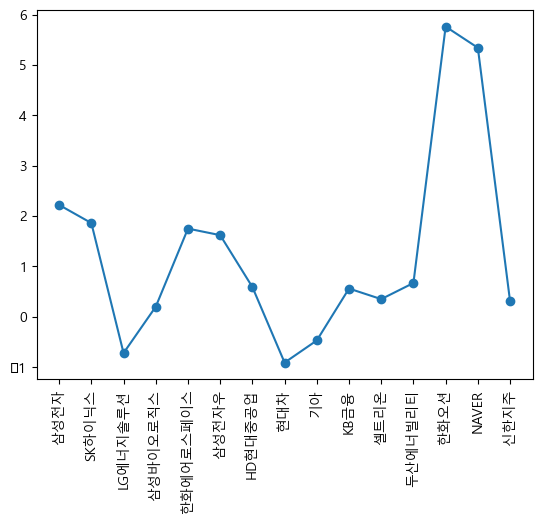

In [22]:
plt.plot(df["종목명"],df["등락률"],marker ="o")
plt.xticks(rotation=90)
plt.show()

* 테이블 포멧은 상동

In [27]:
data=[]

for item in soup.select("div.group_quot .heading_area"):
    name = item.select_one("h4.blind")
    link = item.select_one("a")

    price = link.select('num').get_text(strip=True)
    change = link.select('num2').get_text(strip=True)
    change_pct = link.select('num3').get_text(strip=True)
    rows.append([name,price,change,change_pct])

# DataFrame 생성
df = pd.DataFrame(data, columns=["종목명", "가격", "등락액","등락률"])
df


AttributeError: ResultSet object has no attribute 'get_text'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

# 기타 테이블 스크래핑에 도전해 보세요.